In [1]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from uatk_spc.reader import SPCReaderProto, SPCReaderParquet

#### Compare `SPCReaderProto` and `SPCReaderParquet`

Compare the ability to read into dataframes and dict directly from protobuf or from parquet.


In [2]:
%%time
path = "../../data/output/England/2020/rutland.pb"

# Read from protobuf
spc = SPCReaderProto(path)

CPU times: user 4.73 s, sys: 124 ms, total: 4.85 s
Wall time: 4.86 s


In [3]:
# Show people after read from protobuf
spc.people

shape: (40_381, 10)
┌───────┬───────────┬───────────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ id    ┆ household ┆ workplace ┆ identifier ┆ … ┆ health     ┆ events     ┆ weekdayDi ┆ weekendDi │
│ ---   ┆ ---       ┆ ---       ┆ s          ┆   ┆ ---        ┆ ---        ┆ aries     ┆ aries     │
│ str   ┆ str       ┆ str       ┆ ---        ┆   ┆ struct[7]  ┆ struct[7]  ┆ ---       ┆ ---       │
│       ┆           ┆           ┆ struct[4]  ┆   ┆            ┆            ┆ list[i64] ┆ list[i64] │
╞═══════╪═══════════╪═══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 0     ┆ 0         ┆ 1168      ┆ {"E0200286 ┆ … ┆ {39.47709, ┆ {0.255,0.1 ┆ [1796,    ┆ [1795,    │
│       ┆           ┆           ┆ 3_0001_001 ┆   ┆ false,fals ┆ 6065,0.002 ┆ 2877, …   ┆ 2876, …   │
│       ┆           ┆           ┆ ","1731030 ┆   ┆ e,false,"G ┆ 589,0.0011 ┆ 15973]    ┆ 15974]    │
│       ┆           ┆           ┆ 8"…        ┆   ┆ OO…        ┆ 09…        ┆           ┆           │
│ 1     ┆ 0         ┆ 155       ┆ {"E0200286 ┆ … ┆ {22.909258 ┆ {0.255,0.1 ┆ [289,     ┆ [288,     │
│       ┆           ┆           ┆ 3_0001_002 ┆   ┆ ,false,fal ┆ 887,0.0089 ┆ 2183, …   ┆ 2184, …   │
│       ┆           ┆           ┆ ","1205011 ┆   ┆ se,false," ┆ 82,0.02095 ┆ 15161]    ┆ 15162]    │
│       ┆           ┆           ┆ 7"…        ┆   ┆ GO…        ┆ 8,…        ┆           ┆           │
│ 2     ┆ 1         ┆ 0         ┆ {"E0200286 ┆ … ┆ {25.25762, ┆ {0.239,0.1 ┆ [89, 677, ┆ [88, 678, │
│       ┆           ┆           ┆ 3_0002_001 ┆   ┆ false,fals ┆ 5057,8.467 ┆ … 16391]  ┆ … 16390]  │
│       ┆           ┆           ┆ ","1128040 ┆   ┆ e,false,"G ┆ 2e-16,3.62 ┆           ┆           │
│       ┆           ┆           ┆ 8"…        ┆   ┆ OO…        ┆ 88…        ┆           ┆           │
│ 3     ┆ 1         ┆ 0         ┆ {"E0200286 ┆ … ┆ {31.486355 ┆ {0.268,0.0 ┆ [2844,    ┆ [2845,    │
│       ┆           ┆           ┆ 3_0002_002 ┆   ┆ ,false,tru ┆ 9916,3.555 ┆ 5035, …   ┆ 5034, …   │
│       ┆           ┆           ┆ ","1611080 ┆   ┆ e,true,"VE ┆ 7e-12,8.29 ┆ 15284]    ┆ 15283]    │
│       ┆           ┆           ┆ 5"…        ┆   ┆ RY…        ┆ 67…        ┆           ┆           │
│ …     ┆ …         ┆ …         ┆ …          ┆ … ┆ …          ┆ …          ┆ …         ┆ …         │
│ 40377 ┆ 16696     ┆ 0         ┆ {"E0200286 ┆ … ┆ {35.67418, ┆ {0.257,0.1 ┆ [56, 263, ┆ [57, 262, │
│       ┆           ┆           ┆ 7_3698_003 ┆   ┆ false,fals ┆ 6191,1.788 ┆ … 16331]  ┆ … 16330]  │
│       ┆           ┆           ┆ ","1501121 ┆   ┆ e,false,"G ┆ 871,0.7666 ┆           ┆           │
│       ┆           ┆           ┆ 6"…        ┆   ┆ OO…        ┆ 59…        ┆           ┆           │
│ 40378 ┆ 16696     ┆ 0         ┆ {"E0200286 ┆ … ┆ {0.0,false ┆ {0.257,0.0 ┆ [107,     ┆ [106,     │
│       ┆           ┆           ┆ 7_3698_004 ┆   ┆ ,false,fal ┆ 9509,0.070 ┆ 453, …    ┆ 454, …    │
│       ┆           ┆           ┆ ","1201091 ┆   ┆ se,"GOOD", ┆ 802,0.1652 ┆ 16247]    ┆ 16246]    │
│       ┆           ┆           ┆ 3"…        ┆   ┆ "L…        ┆ 05…        ┆           ┆           │
│ 40379 ┆ 16697     ┆ 0         ┆ {"E0200286 ┆ … ┆ {29.488407 ┆ {0.09,0.11 ┆ [762,     ┆ [761,     │
│       ┆           ┆           ┆ 7_3699_001 ┆   ┆ ,false,fal ┆ 34,2.9846e ┆ 5168, …   ┆ 5169, …   │
│       ┆           ┆           ┆ ","1508061 ┆   ┆ se,false," ┆ -31,1.2791 ┆ 8977]     ┆ 8976]     │
│       ┆           ┆           ┆ 2"…        ┆   ┆ FA…        ┆ e-…        ┆           ┆           │
│ 40380 ┆ 16697     ┆ 0         ┆ {"E0200286 ┆ … ┆ {27.604254 ┆ {0.233,0.1 ┆ [832,     ┆ [831,     │
│       ┆           ┆           ┆ 7_3699_002 ┆   ┆ ,false,fal ┆ 4679,3.819 ┆ 847, …    ┆ 848, …    │
│       ┆           ┆           ┆ ","1910111 ┆   ┆ se,false," ┆ 5925,1.636 ┆ 15186]    ┆ 15185]    │
│       ┆           ┆           ┆ 8"…        ┆   ┆ GO…        ┆ 96…        ┆           ┆           │
└───────┴───────────┴───────────┴────────

In [4]:
%%time
# Read from parquet and JSON
spc = SPCReaderParquet(path)

CPU times: user 129 ms, sys: 25.7 ms, total: 154 ms
Wall time: 110 ms


In [5]:
# Show households after read from parquet and JSON
spc.households.head()

shape: (5, 5)
┌─────┬───────────┬───────────┬─────────────┬───────────────────────────────────┐
│ id  ┆ msoa      ┆ oa        ┆ members     ┆ details                           │
│ --- ┆ ---       ┆ ---       ┆ ---         ┆ ---                               │
│ u64 ┆ str       ┆ str       ┆ list[u64]   ┆ struct[8]                         │
╞═════╪═══════════╪═══════════╪═════════════╪═══════════════════════════════════╡
│ 0   ┆ E02002863 ┆ E00069595 ┆ [0, 1]      ┆ {"E02002863_0001",6,1,null,6,tru… │
│ 1   ┆ E02002863 ┆ E00069551 ┆ [2, 3, 4]   ┆ {"E02002863_0002",5,3,null,5,tru… │
│ 2   ┆ E02002863 ┆ E00069564 ┆ [5, 6]      ┆ {"E02002863_0003",2,2,null,6,tru… │
│ 3   ┆ E02002863 ┆ E00069558 ┆ [7, 8]      ┆ {"E02002863_0004",1,1,null,6,tru… │
│ 4   ┆ E02002863 ┆ E00172626 ┆ [9, 10, 11] ┆ {"E02002863_0005",3,2,null,4,tru… │
└─────┴───────────┴───────────┴─────────────┴───────────────────────────────────┘

#### Use `SPCReaderParquet` to explore Greater London

Reading directly from protobuf is memory intensive in python. We explore reading from parquet and JSON outputs.


In [6]:
%%time
path = "../../data/output/England/2020/greater-london.pb"
spc = SPCReaderParquet(path)

CPU times: user 29.2 s, sys: 7.25 s, total: 36.4 s
Wall time: 22.6 s


In [7]:
# Print people
spc.people

shape: (8_992_494, 11)
┌─────────┬───────────┬───────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ id      ┆ household ┆ workplace ┆ location   ┆ … ┆ health    ┆ events    ┆ weekday_d ┆ weekend_d │
│ ---     ┆ ---       ┆ ---       ┆ ---        ┆   ┆ ---       ┆ ---       ┆ iaries    ┆ iaries    │
│ u64     ┆ u64       ┆ u64       ┆ struct[2]  ┆   ┆ struct[7] ┆ struct[7] ┆ ---       ┆ ---       │
│         ┆           ┆           ┆            ┆   ┆           ┆           ┆ list[u64] ┆ list[u64] │
╞═════════╪═══════════╪═══════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0         ┆ 304943    ┆ {-0.094911 ┆ … ┆ {10.97767 ┆ {0.257,0. ┆ [45, 82,  ┆ [44, 83,  │
│         ┆           ┆           ┆ ,51.520271 ┆   ┆ 4,false,f ┆ 19018,2.3 ┆ … 15830]  ┆ … 15831]  │
│         ┆           ┆           ┆ }          ┆   ┆ alse,fals ┆ 01214,5.3 ┆           ┆           │
│         ┆           ┆           ┆            ┆   ┆ e,0,2…    ┆ 69498…    ┆           ┆           │
│ 1       ┆ 1         ┆ 301389    ┆ {-0.094911 ┆ … ┆ {21.99039 ┆ {0.233,0. ┆ [821,     ┆ [822,     │
│         ┆           ┆           ┆ ,51.520271 ┆   ┆ 8,false,f ┆ 29358,2.5 ┆ 2417, …   ┆ 2416, …   │
│         ┆           ┆           ┆ }          ┆   ┆ alse,fals ┆ 78756,1.1 ┆ 12483]    ┆ 12484]    │
│         ┆           ┆           ┆            ┆   ┆ e,0,2…    ┆ 05181…    ┆           ┆           │
│ 2       ┆ 2         ┆ 304317    ┆ {-0.094911 ┆ … ┆ {17.32859 ┆ {0.268,0. ┆ [1499]    ┆ [1498]    │
│         ┆           ┆           ┆ ,51.520271 ┆   ┆ 4,false,f ┆ 19832,9.1 ┆           ┆           │
│         ┆           ┆           ┆ }          ┆   ┆ alse,true ┆ 665e-9,2. ┆           ┆           │
│         ┆           ┆           ┆            ┆   ┆ ,0,2,…    ┆ 1388e…    ┆           ┆           │
│ 3       ┆ 2         ┆ null      ┆ {-0.094911 ┆ … ┆ {18.66238 ┆ {0.257,0. ┆ [56, 263, ┆ [57, 262, │
│         ┆           ┆           ┆ ,51.520271 ┆   ┆ 4,false,f ┆ 16191,1.7 ┆ … 16331]  ┆ … 16330]  │
│         ┆           ┆           ┆ }          ┆   ┆ alse,fals ┆ 88871,0.7 ┆           ┆           │
│         ┆           ┆           ┆            ┆   ┆ e,nul…    ┆ 66659…    ┆           ┆           │
│ …       ┆ …         ┆ …         ┆ …          ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 8992490 ┆ 3578613   ┆ null      ┆ {-0.013631 ┆ … ┆ {36.44878 ┆ {0.268,0. ┆ [370,     ┆ [369,     │
│         ┆           ┆           ┆ ,51.479382 ┆   ┆ ,true,tru ┆ 19832,1.9 ┆ 704, …    ┆ 703, …    │
│         ┆           ┆           ┆ }          ┆   ┆ e,true,8, ┆ 274e-13,4 ┆ 16402]    ┆ 16403]    │
│         ┆           ┆           ┆            ┆   ┆ 2,2}      ┆ .4973…    ┆           ┆           │
│ 8992491 ┆ 3578614   ┆ null      ┆ {-0.014714 ┆ … ┆ {20.64561 ┆ {0.257,0. ┆ [5633,    ┆ [5632,    │
│         ┆           ┆           ┆ ,51.469028 ┆   ┆ 5,false,f ┆ 19018,2.2 ┆ 15844]    ┆ 15845]    │
│         ┆           ┆           ┆ }          ┆   ┆ alse,fals ┆ 83841,5.3 ┆           ┆           │
│         ┆           ┆           ┆            ┆   ┆ e,0,2…    ┆ 28962…    ┆           ┆           │
│ 8992492 ┆ 3578614   ┆ null      ┆ {-0.014714 ┆ … ┆ {null,fal ┆ {0.257,0. ┆ [33, 74,  ┆ [32, 75,  │
│         ┆           ┆           ┆ ,51.469028 ┆   ┆ se,false, ┆ 16191,0.0 ┆ … 16378]  ┆ … 16379]  │
│         ┆           ┆           ┆ }          ┆   ┆ false,nul ┆ 08183,0.0 ┆           ┆           │
│         ┆           ┆           ┆            ┆   ┆ l,1,n…    ┆ 03507…    ┆           ┆           │
│ 8992493 ┆ 3578615   ┆ null      ┆ {-0.01084, ┆ … ┆ {26.50530 ┆ {0.239,0. ┆ [312,     ┆ [313,     │
│         ┆           ┆           ┆ 51.476082} ┆   ┆ 1,true,fa ┆ 30114,2.2 ┆ 790, …    ┆ 789, …    │
│         ┆           ┆           ┆            ┆   ┆ lse,false ┆ 734e-20,9 ┆ 16233]    ┆ 16232]    │
│         ┆           ┆           ┆            ┆   ┆ ,5,1,…    ┆ .7432…    ┆           ┆           │
└─────────┴───────────┴───────────┴───

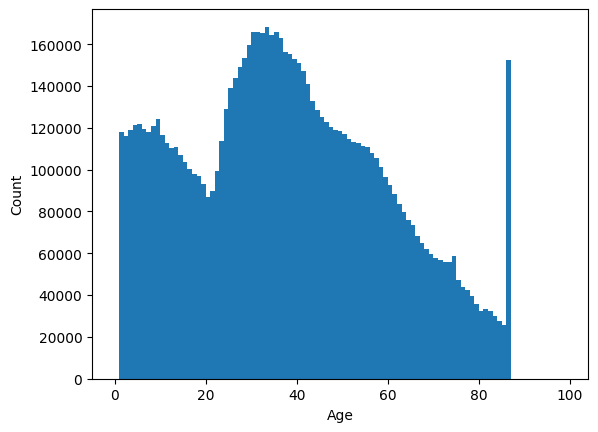

In [8]:
# Plot Age
plt.hist(
    spc.people.unnest("demographics").select("age_years"), bins=np.arange(0, 100, 1)
)
plt.gca().set(xlabel="Age", ylabel="Count")
plt.show()

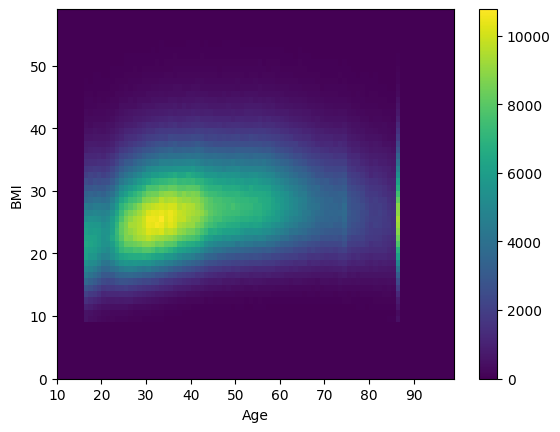

In [9]:
# Plot 2D hist of Age and BMI
age_bmi = (
    spc.people.unnest("demographics")
    .unnest("health")
    .select(["age_years", "bmi"])
    .filter(pl.col("bmi") != None)
    .to_numpy()
)
plt.hist2d(age_bmi[:, 0], age_bmi[:, 1], bins=[np.arange(10, 100), np.arange(0, 60)])
plt.gca().set(xlabel="Age", ylabel="BMI")
plt.colorbar()
plt.show()